In [2]:
data <- read.csv("Final_Crashes_Traffic_Signs_Dataset.csv")

# Convert categorical variables to factors
data$Severity <- as.factor(data$Severity)
data$Road_System <- as.factor(data$Road_System)
data$City <- as.factor(data$City)
data$Nearest.Traffic.Sign.Maxspeed <- as.factor(data$Nearest.Traffic.Sign.Maxspeed)


In [3]:
head(data)

,Road_System,City,Longitude.Crash,Latitude.Crash,Severity,Nearest.Traffic.Sign.Distance,Nearest.Traffic.Sign.Latitude,Nearest.Traffic.Sign.Longitude,Nearest.Traffic.Sign.Maxspeed
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,State Highway,LOUISVILLE,39.98001,-105.1200,No Injury (PDO),0.126833853,-105.1095,39.96216,35 mph
2,State Highway,BOULDER,40.01665,-105.2754,Possible/Complaint of Injury (C,0.049874539,-105.2765,40.00001,25 mph
3,State Highway,BOULDER,40.01691,-105.2741,No Injury (PDO),0.051925650,-105.2724,40.00016,25 mph
4,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO),0.009543356,-105.1025,40.19170,35 mph
5,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO),0.009543356,-105.1025,40.19170,35 mph
6,State Highway,LONGMONT,40.18857,-105.1023,"Evident, Incapacitating (A)",0.009220900,-105.1025,40.19170,35 mph


In [4]:
#lets remove the mph from the last column
data$Nearest.Traffic.Sign.Maxspeed <- gsub("mph", "", data$Nearest.Traffic.Sign.Maxspeed)

In [5]:
head(data)

,Road_System,City,Longitude.Crash,Latitude.Crash,Severity,Nearest.Traffic.Sign.Distance,Nearest.Traffic.Sign.Latitude,Nearest.Traffic.Sign.Longitude,Nearest.Traffic.Sign.Maxspeed
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
1,State Highway,LOUISVILLE,39.98001,-105.1200,No Injury (PDO),0.126833853,-105.1095,39.96216,35
2,State Highway,BOULDER,40.01665,-105.2754,Possible/Complaint of Injury (C,0.049874539,-105.2765,40.00001,25
3,State Highway,BOULDER,40.01691,-105.2741,No Injury (PDO),0.051925650,-105.2724,40.00016,25
4,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO),0.009543356,-105.1025,40.19170,35
5,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO),0.009543356,-105.1025,40.19170,35
6,State Highway,LONGMONT,40.18857,-105.1023,"Evident, Incapacitating (A)",0.009220900,-105.1025,40.19170,35


1. Basic Summary of the data:

This code cell/output contains the basic summary of the dataset which we chose. It also contains a plot of the Severity of the accidents by taking in the Nearest Distance to the Traffic Sign as a parameter since that is these 2 are one of the most important features in the dataset.

In [6]:
summary(data)


        Road_System               City      Longitude.Crash Latitude.Crash  
 City Street  :2189   LONGMONT      :1500   Min.   :38.14   Min.   :-105.5  
 County Road  : 236   BOULDER       :1394   1st Qu.:40.00   1st Qu.:-105.3  
 State Highway:2133   UNINCORPORATED: 823   Median :40.03   Median :-105.1  
                      LAFAYETTE     : 466   Mean   :40.07   Mean   :-105.2  
                      LOUISVILLE    : 251   3rd Qu.:40.16   3rd Qu.:-105.1  
                      ERIE          :  54   Max.   :41.12   Max.   :-104.9  
                      (Other)       :  70                                   
                            Severity    Nearest.Traffic.Sign.Distance
 Evident Non-Incapacitating (B) : 490   Min.   :0.000276             
 Evident, Incapacitating (A)    : 150   1st Qu.:0.012404             
 Fatal (K)                      :  31   Median :0.039384             
 No Injury (PDO)                :3074   Mean   :0.063754             
 PDO                            : 

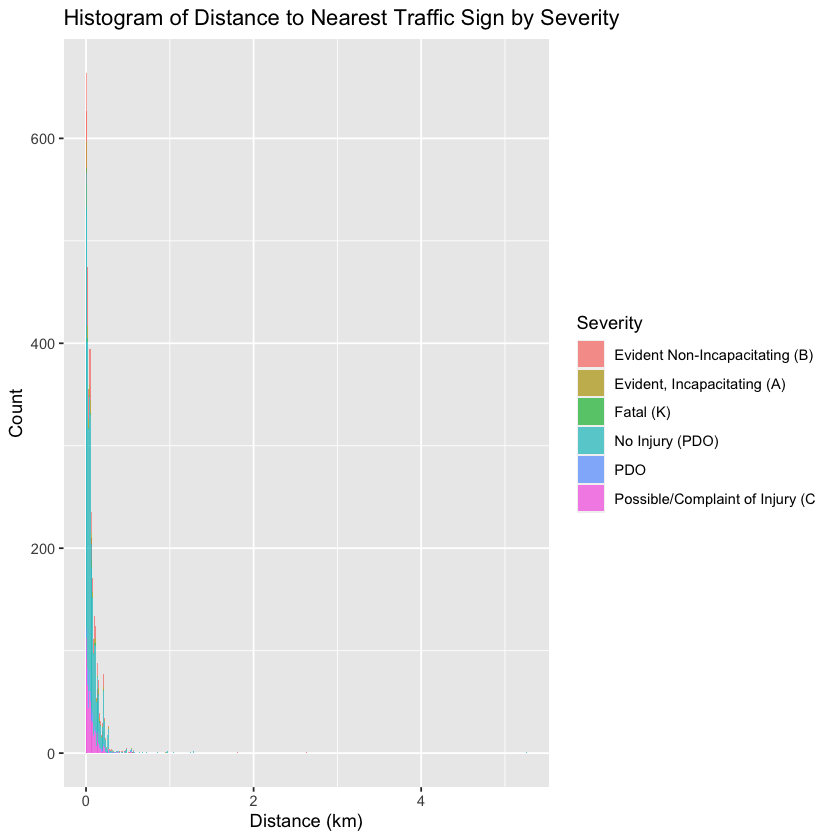

In [7]:
# A histogram of the distance to the nearest traffic sign by severity
library(ggplot2)
ggplot(data, aes(x=Nearest.Traffic.Sign.Distance, fill=Severity)) + 
  geom_histogram(binwidth=0.01, alpha=0.7) + 
  labs(title="Histogram of Distance to Nearest Traffic Sign by Severity", x="Distance (km)", y="Count")


2. Generalized Linear Model

Here lets fit a Generalized Linear Model with Severity as the target variable and Nearest Distance to the Traffic Sign, Road System, City, speed limit as the predictor variables.

In [8]:
model <- glm(Severity ~ Nearest.Traffic.Sign.Distance + Road_System + City + Nearest.Traffic.Sign.Maxspeed, 
             data=data, family=binomial())

summary(model)


Call:
glm(formula = Severity ~ Nearest.Traffic.Sign.Distance + Road_System + 
    City + Nearest.Traffic.Sign.Maxspeed, family = binomial(), 
    data = data)

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)                       14.684591 311.409147   0.047   0.9624  
Nearest.Traffic.Sign.Distance     -0.236827   0.323573  -0.732   0.4642  
Road_SystemCounty Road             0.383840   0.264819   1.449   0.1472  
Road_SystemState Highway           0.097625   0.117584   0.830   0.4064  
CityDACONO                       -16.134103 882.743585  -0.018   0.9854  
CityERIE                           0.295892   0.488373   0.606   0.5446  
CityFORT COLLINS                  12.570612 882.743464   0.014   0.9886  
CityLAFAYETTE                      0.463052   0.313125   1.479   0.1392  
CityLONGMONT                       0.149360   0.138030   1.082   0.2792  
CityLOUISVILLE                    -0.006811   0.248489  -0.027   0.9781  
CityLYONS  

As evident in the summary table we can see the p-values and the intercepts of the model. Lets start off by taking:

1. p-values greater than 0.05: In our model the distance to the nearest traffic sign (Nearest.Traffic.Sign.Distance), most of the City categories, Road_SystemState Highway, and Nearest.Traffic.Sign.Maxspeed, show p-values well above 0.05. This means that these variables are not statistically significant in predicting the severity of the accidents.

2. p-values less than 0.05: The variable CityUNINCORPORATED shows a p-value of 0.0228, which is below the 0.05 threshold. This indicates a statistically significant association between crashes occurring in unincorporated areas and higher crash severity. But this might not be the greatest variable. 

Though the values are there we might still need to recheck whether or not these affect the model in a significant way.

3. t-test

In [9]:
t.test(as.integer(as.factor(data$Nearest.Traffic.Sign.Distance)) ~ as.integer(as.factor(data$Severity)))


ERROR: Error in t.test.formula(as.integer(as.factor(data$Nearest.Traffic.Sign.Distance)) ~ : grouping factor must have exactly 2 levels


For our data we can't seem to run the t-test because the Severity has multiple levels such as Fatal, Non-Incapacitating, Incapacitating, and Possible Injury etc. Hence we cannot run the t-test on this data.

4. ANOVA Model

In [10]:
anova_model <- aov(Nearest.Traffic.Sign.Distance ~ Severity, data=data)
summary(anova_model)

              Df Sum Sq Mean Sq F value Pr(>F)
Severity       5   0.11 0.02114   1.389  0.225
Residuals   4552  69.30 0.01522               

Here the anova model is being deployed to check the significance of the Nearest Traffic Sign Distance and the Severity.

The degree of freedom for Severity is 5 which means that there are 6 different levels of Severity in the dataset. The p-value is greater than 0.05 which means that there is no statistically significant difference in the distances to the nearest traffic sign among the different severity categories.

The results of the ANOVA test suggest that the distance to the nearest traffic sign does not vary significantly with the severity of the traffic incidents in your dataset.

5. Bootstrap



The downloaded binary packages are in
	/var/folders/fc/z92zk78d4yng8j2rj9dmfldw0000gn/T//RtmpeQUAh0/downloaded_packages


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_data, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.0601,  0.0671 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_data, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.0604,  0.0674 )  
Calculations and Intervals on Original Scale

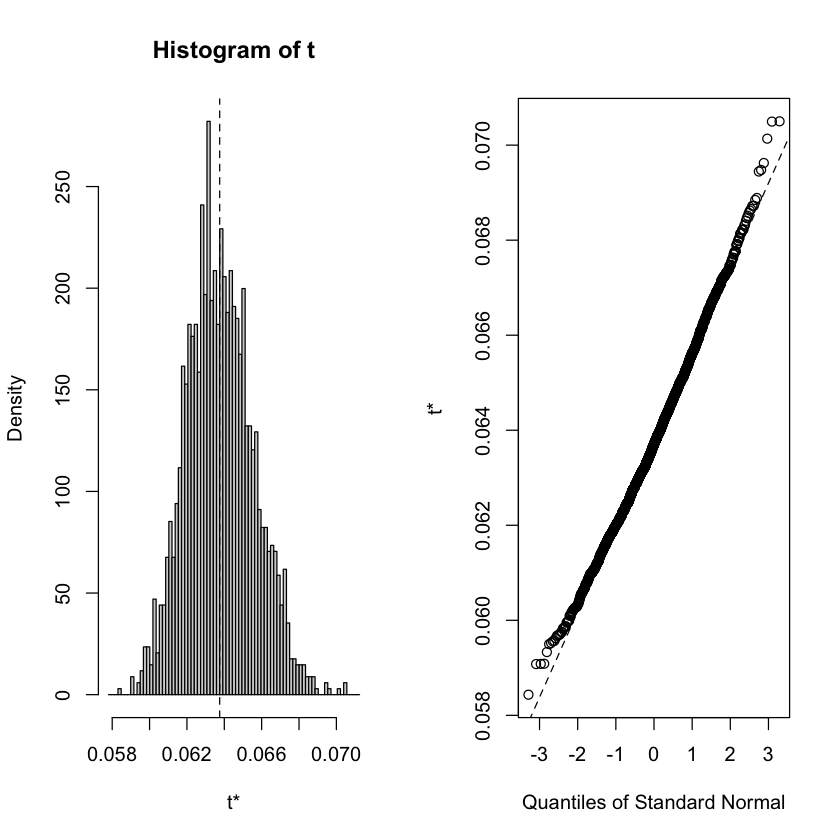

In [11]:
install.packages("boot")
library(boot)


set.seed(123)
boot_data <- boot(data$Nearest.Traffic.Sign.Distance, 
                  statistic = function(x, i) {
                    sampled <- x[i]
                    mean(sampled)
                  }, R=2000)

# This is mainly used to generate the confience intervals for the Traffic Sign Bootstrap.
boot.ci(boot_data, type="basic")
boot.ci(boot_data, type="perc")


par(bg = "white")
plot(boot_data,bg="white")

The bootstrap method here is used to estimate the average distance to the nearest traffic sign. Here we have resampled it 2000 times, and then checked the 95% confidence interval. This led us to the Basic interval: 0.0601 to 0.0671 units. Since the gap in the interval is really less this means that the data is really accurate and the model is really good.

6. Diagnostic Plots

Warning message:
"not plotting observations with leverage one:
  544, 1263"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


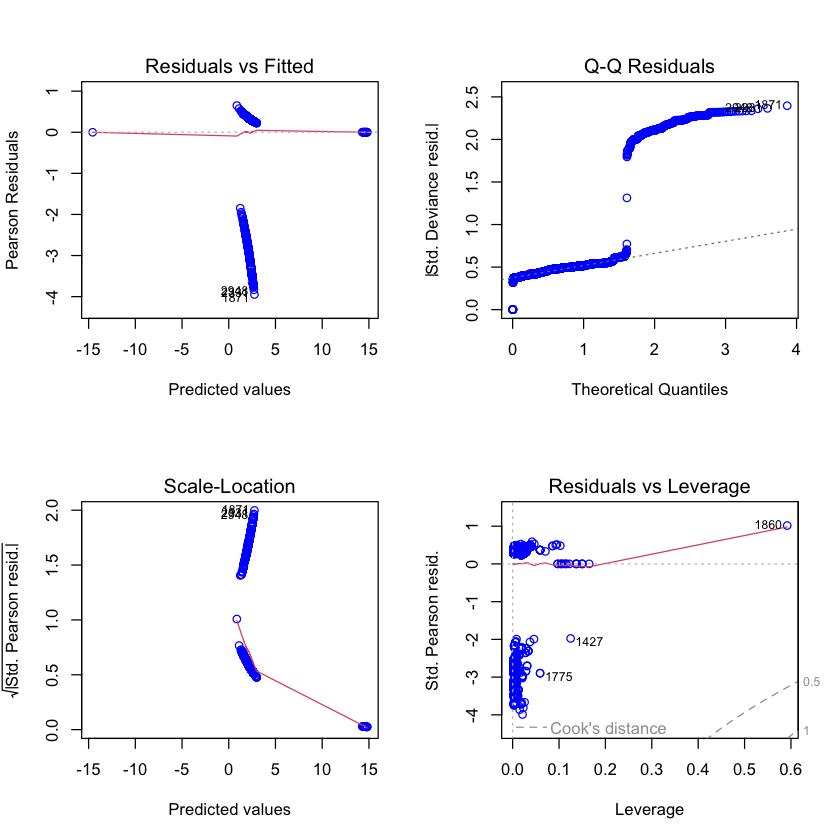

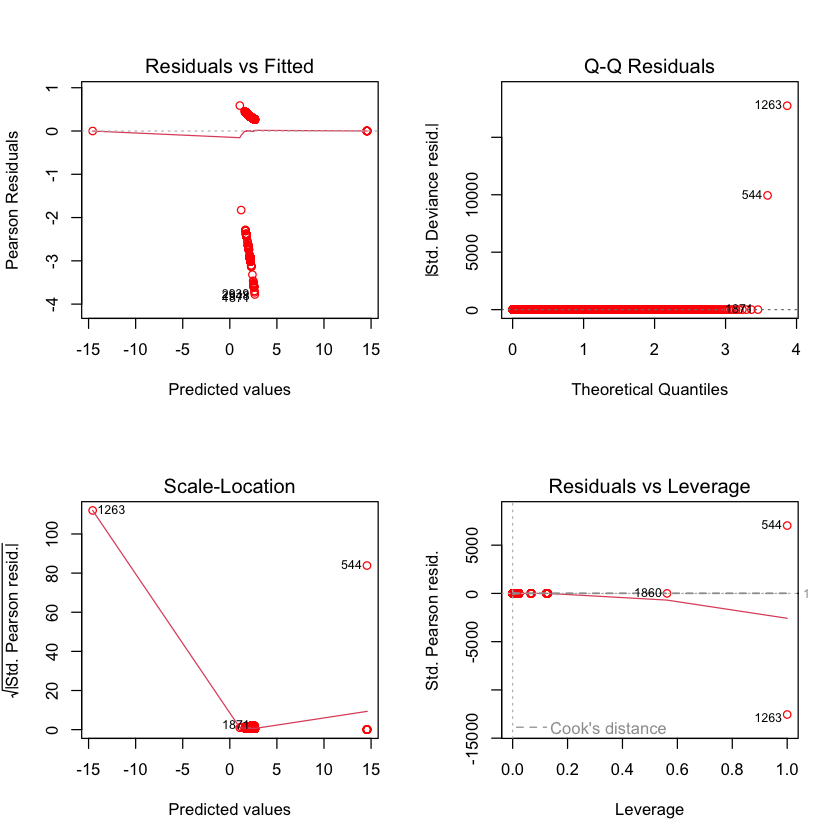

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


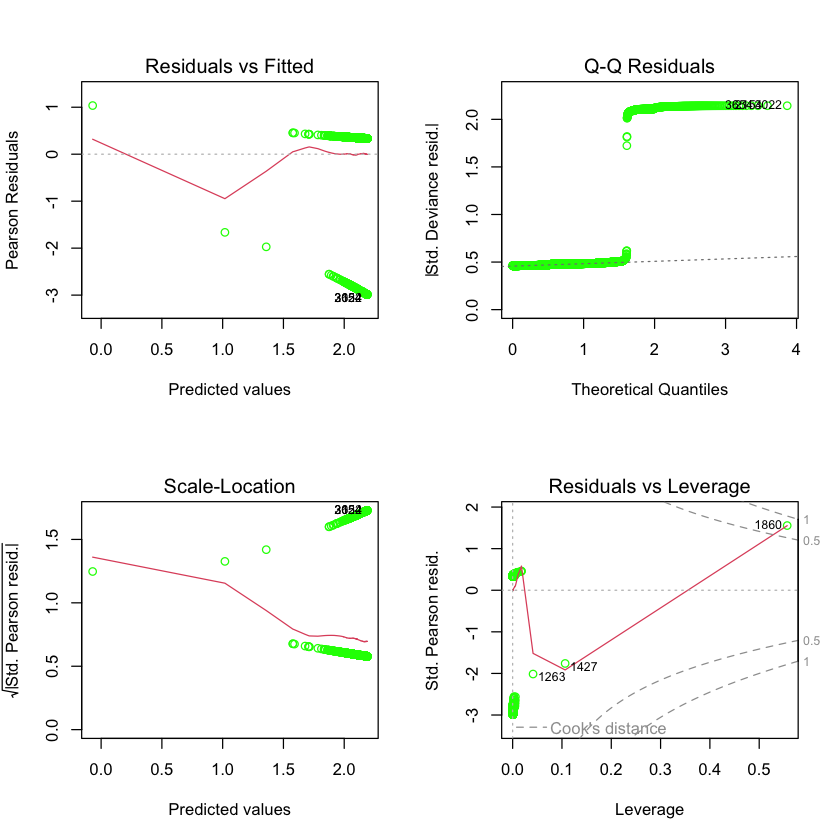

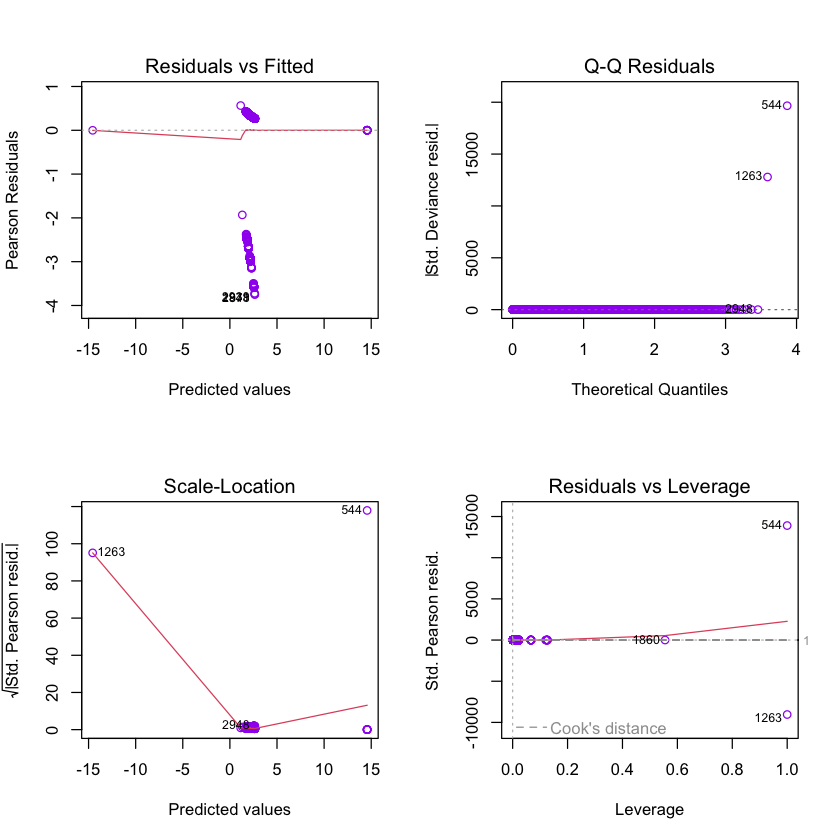

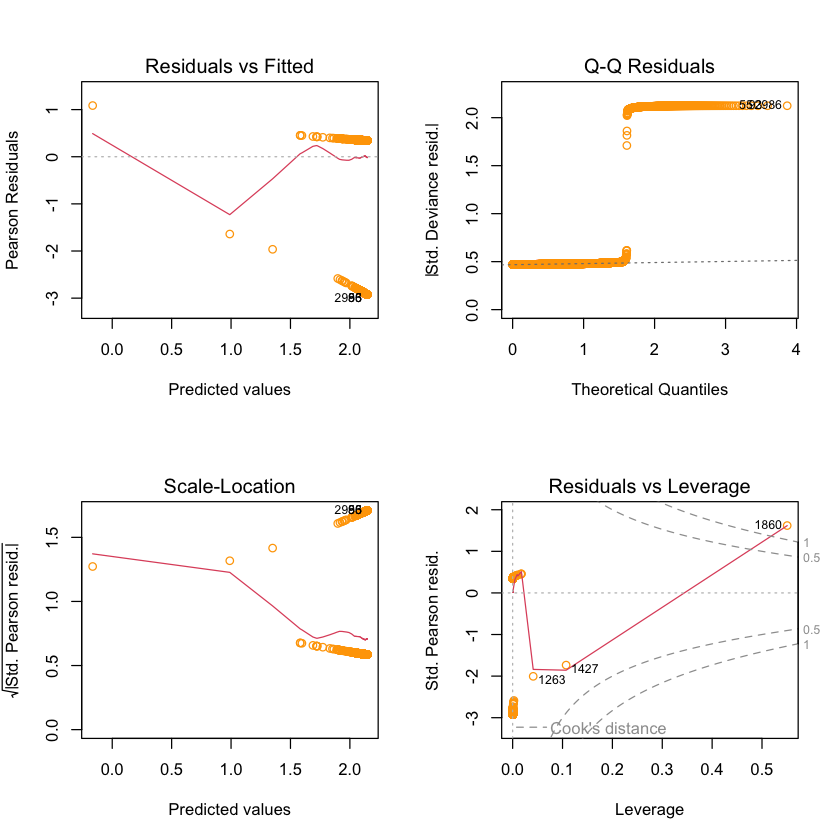

In [12]:
model_1 <- glm(Severity ~ Nearest.Traffic.Sign.Distance + Road_System + City + Nearest.Traffic.Sign.Maxspeed, data=data, family=binomial())

model_2 <- glm(Severity ~ Nearest.Traffic.Sign.Distance + Road_System + City, data=data, family=binomial())

model_3 <- glm(Severity ~ Nearest.Traffic.Sign.Distance + Road_System, data=data, family=binomial())

model_4 <- glm(Severity ~ Nearest.Traffic.Sign.Distance + City, data=data, family=binomial())

model_5 <- glm(Severity ~ Nearest.Traffic.Sign.Distance,data=data, family=binomial())

par(mfrow=c(2,2),bg = "white")
plot(model_1, col="blue")
plot(model_2, col="red")
plot(model_3, col="green")
plot(model_4, col="purple")
plot(model_5, col="orange")

Now among these 5 plots the best plot seems to be the 3rd model which is the one in green. This is because of the following reasons:

Residual vs Fitted plot: No constant pattern.

Q-Q Plot: The points at one end of the tail entirely lie on the line. This means that the data is partially normally distributed which is realtively better when compared to all othe models.

Residual vs Leverage plot: The points arent inside the Cook's distance which means that the model is better and even though these points might affect the model they arent as significant as the other model variables.

So from the above plots we can say that the 3rd model is the best model among all the models. 
This contains Severity , Nearest Traffic Sign Distance, Road System. We'll now use this model to find and runa  few more statistical tests.

7. Naive Bayes


The downloaded binary packages are in
	/var/folders/fc/z92zk78d4yng8j2rj9dmfldw0000gn/T//RtmpeQUAh0/downloaded_packages


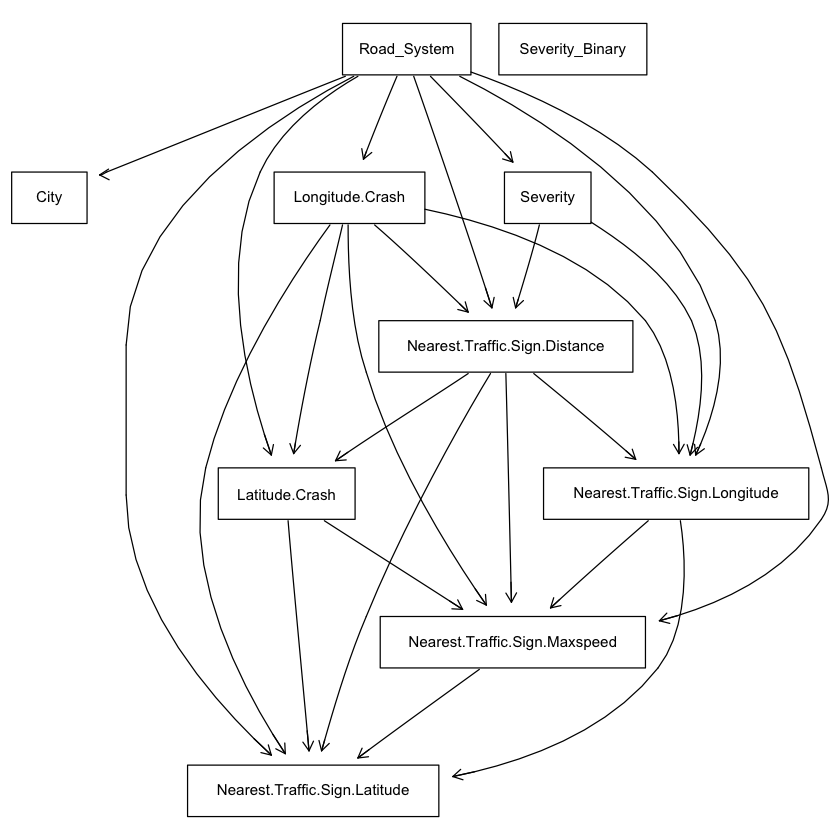

In [24]:
install.packages("bnlearn")
library(bnlearn)

# This is to make sure than the Nearest.Traffic.Sign.Maxspeed is a numeric variable
data$Nearest.Traffic.Sign.Maxspeed <- as.numeric(data$Nearest.Traffic.Sign.Maxspeed)

# This code part is to make sure that we create a Bayesian Network for the dataset
bn_structure <- hc(data)
bn_model <- bn.fit(bn_structure, data)

#The output of the model is pretty big and incase you want to see it, pls uncomment the below line
# print(bn_model)

if (!requireNamespace("Rgraphviz", quietly = TRUE)) {
  if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
  BiocManager::install("Rgraphviz")
}

#This is make sure that we plot the Bayesian Network
par(bg = "white")
bnlearn::graphviz.plot(bn_structure)

8. AIC and BIC Model

In [14]:
#lets make a for loop to see the different models with AIC and BIC
for (i in 1:5) {
  print(paste("Model", i, "AIC:", AIC(get(paste("model_", as.character(i), sep = "")))))
  print(paste("Model", i, "BIC:", BIC(get(paste("model_", as.character(i), sep = "")))))
}

[1] "Model 1 AIC: 3128.74954784355"
[1] "Model 1 BIC: 3327.91336334753"
[1] "Model 2 AIC: 3113.87512962467"
[1] "Model 2 BIC: 3203.82007856195"
[1] "Model 3 AIC: 3116.01380476414"
[1] "Model 3 BIC: 3141.71236160336"
[1] "Model 4 AIC: 3111.10192568597"
[1] "Model 4 BIC: 3188.19759620364"
[1] "Model 5 AIC: 3112.85528365294"
[1] "Model 5 BIC: 3125.70456207255"


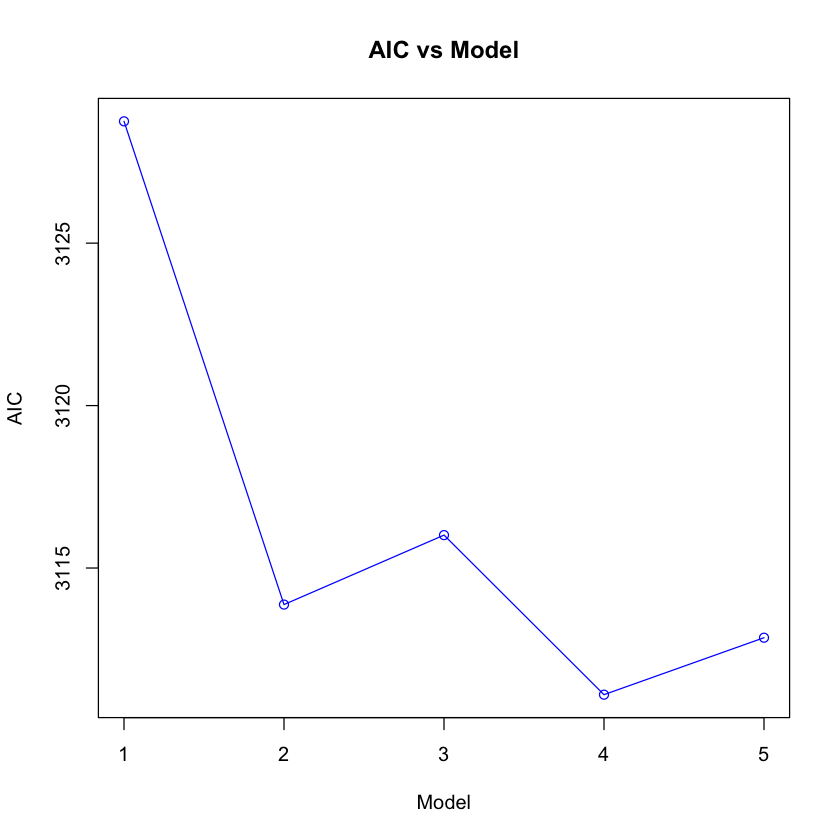

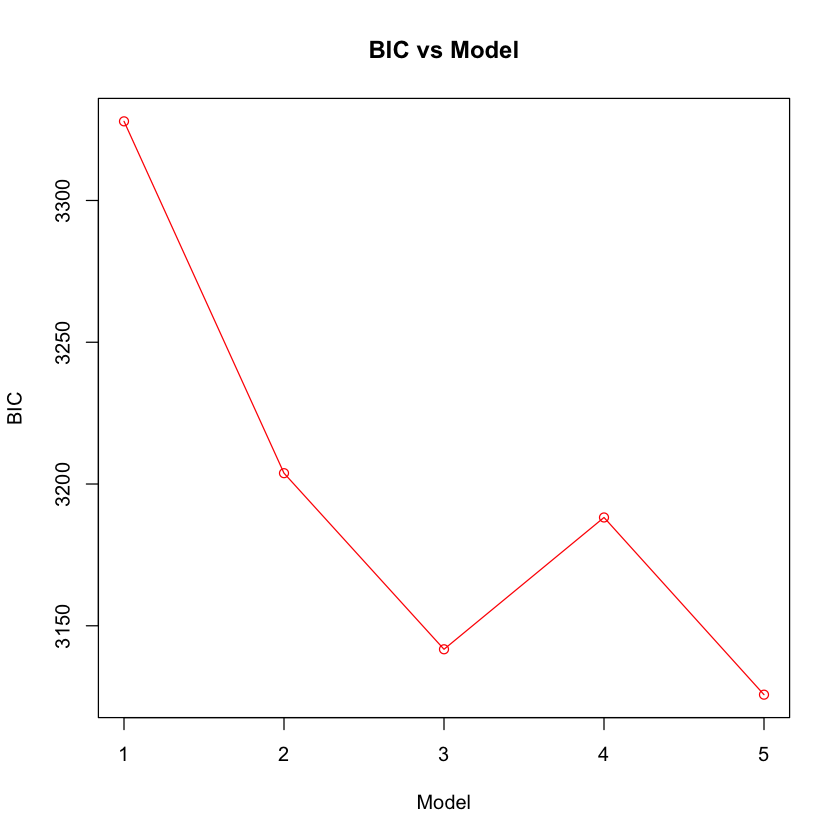

In [25]:
#now lets plot the AIC and BIC
AIC_values <- c(AIC(model_1), AIC(model_2), AIC(model_3), AIC(model_4), AIC(model_5))
BIC_values <- c(BIC(model_1), BIC(model_2), BIC(model_3), BIC(model_4), BIC(model_5))

par(bg = "white")
plot(AIC_values, col="blue", type="o", xlab="Model", ylab="AIC", main="AIC vs Model")
plot(BIC_values, col="red", type="o", xlab="Model", ylab="BIC", main="BIC vs Model")



From this table we can see that the best AIC value is associated with model 4 and the best BIC value is associated with model 5. This might cause us to think that these models might be the best but when we take a loook at the diagnostic plot we see that the 3rd model is the best model and additionally the AIC and BIC values for the 3rd model aren't too far off from model 4 and 5.

9. Permutation Test

In [15]:
# Permutation test for difference in means
perm_test <- function(data, n_perm=1000) {
  observed_diff <- diff(tapply(data$Nearest.Traffic.Sign.Distance, data$Severity, mean))
  perm_diffs <- replicate(n_perm, {
    permuted <- sample(data$Severity)
    diff(tapply(data$Nearest.Traffic.Sign.Distance, permuted, mean))
  })
  p_value <- mean(max(abs(perm_diffs)) >= max(abs(observed_diff)))
  list(observed_difference = observed_diff, p_value = p_value)
}

perm_test(data)


$observed_difference
    Evident, Incapacitating (A)                       Fatal (K) 
                   -0.005396815                     0.010903893 
                No Injury (PDO)                             PDO 
                   -0.015042073                     0.012464081 
Possible/Complaint of Injury (C 
                   -0.019247713 

$p_value
[1] 1

The permutation test here is to find the whether or not the mean of the Nearest Traffic Sign Distance is significantly different between the different severity levels. Now we see that the p_value is equal to 1 which means that the observed difference in the mean distance to the nearest traffic sign between the different severity levels is not statistically significant.

10. Confidence Interval

In [16]:
confint_mean <- function(data) {
  mean_val <- mean(data)
  se <- sd(data) / sqrt(length(data))
  lower <- mean_val - qt(0.975, df=length(data)-1) * se
  upper <- mean_val + qt(0.975, df=length(data)-1) * se
  c(lower, upper)
}

confint_mean(data$Nearest.Traffic.Sign.Distance)


[1] 0.06017021 0.06733743

This is mainly used for us to determine the confidence intervals which was already found initially using the bootstrap method. The confidence interval is 0.0601 to 0.0673 which is the same as the one found using the bootstrap method. 

GLM

In [17]:
data$Severity_Binary <- ifelse(data$Severity == "No Injury (PDO)", 0, 1)
glm_model <- glm(Severity_Binary ~ Road_System+ Nearest.Traffic.Sign.Distance,
                 family=binomial(), data=data)
summary(glm_model)



Call:
glm(formula = Severity_Binary ~ Road_System + Nearest.Traffic.Sign.Distance, 
    family = binomial(), data = data)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -0.82164    0.04841 -16.974  < 2e-16 ***
Road_SystemCounty Road         0.47710    0.14125   3.378 0.000731 ***
Road_SystemState Highway       0.13995    0.06530   2.143 0.032091 *  
Nearest.Traffic.Sign.Distance  0.01773    0.25455   0.070 0.944467    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5752.2  on 4557  degrees of freedom
Residual deviance: 5738.8  on 4554  degrees of freedom
AIC: 5746.8

Number of Fisher Scoring iterations: 4


This is the glm which was implemented by taking the variables from model_3 which was the best model among the lot. From the summary here we can point out a few facts:

1. Since the p-values of the Road_System for County Road and State Highway is less than 0.05 this means that there are the statistically significant predictors of the severity of the accidents. 

2. Though we started off to check if Nearest Traffic Sign Distance is a significant prditor of the severity of the accidents we see that the p-value is greater than 0.05 which means that it is not a significant predictor of the severity of the accidents.

3. When compared to a Severity turning into an injury there is higher chance of it being a fatal accident when the accident occurs on a County Road rather than a State Highway.



# Report

## Title: Impact of Proximity to Traffic Signs on Crash Severity in Different Road Systems

### Introduction

 - In the current world though everything is being technologically advancing, road safety is still a major concern. With this in regards there are multiple factors that contribute to road accidents. Understanding these factors to improve the road conditions is essential to improve road safety. Among these factors Traffic signs play a major role.

 - Traffic accidents as mentioned are influenced majorly by driver behavior, road conditions, and vehicle conditions. Among these road signs plays an essential role is relaying information to the driver and paralelly to the pedestrian too. Modifying these signs can greatly affect the road safety from both the driver and pedestrian perspective.

 - Previous case studies and surveys have majorly aligned to the fact that the importance of traffic signs is absolutely necessary additionally the right placement which includes the visibility and the proximity is also a major factor. On an additional note, over placement of signs can also lead to accidents due to distraction.

 - Since the current project is mainly restricted to the county of Boulder, Colorado. The data majorly came from the real incidents which were reported by public, authorities, and other sources. The data is is an observational study. The data was collected by the Boulder County Government Officials. The data was collected so that the authorities can analyse and make necessary changes to improve the road safety.

 Questions to be answered:

  1. How does the distance to the nearest traffic sign affect the severity of traffic crashes?
  2.  Does this impact vary across different types of road systems or cities?
  3. Also whether the speed limit of the road system has any impact on the severity of the crash?

### Data Collection

The initial dataset consisted of 2 seperate files which were then collected accordingly. The first file was a csv file which was directly downloaded from the Boulder County Government website this contained the Crash data, this contained the crash location, Severity, City, Road System. The final second file was also a csv file whose data was collected using the OpenStreetMaps library this returned the Traffic Sign data which contained the location, type of traffic sign, speed limit. Then these 2 files were preprocessed and then combined to the final dataset, which was then used for the analysis.

My github link contains the code for the data collection and preprocessing.

Website URL: https://github.com/BhargavN02/Impact-of-Proximity-to-Traffic-Signs-on-Crash-Severity-in-Different-Road-Systems/blob/main/Data%20Cleaning.ipynb



#### Exploratory Data Analysis:

Having discussed about the data collection methods. Now lets talk about the data preprocessing and the exploratory data analysis. 

1. Filtering Data: Few irrelevant data such as "name","geometry" , "osm_id" were removed from the Traffic Sign data. The crash data was also filtered to remove the irrelevant data.

2. Seperating the Data: The Longitude and Latitude columns were intially in the same cell which was then seperated into 2 sepearte columns for better analysis.

3. Data Conversion: A few of the columns were converted from character to numeric especially the longitude and latitude columns.

4. Missing Values and Removal: In the speed limit column the "mph" was removed to make the column a numeric column. The missing values from the longitude and latitude columns were removed.

5. New Columns: A new column was created to calculate the distance between the crash location and the nearest traffic sign.


#### Analysis, Results and Inferences:

We start off with mainly analyzing the distance between the crash location and the nearest traffic sign along with the Severity of the crash. The distance was calculate by using the raduis of the earth and the haversine formula. The distance was then calculated in miles. With the final data set we use the necessary statistical tests to analyze the data.

The first histogram is between the Nearest Traffic Sign Distance and the Severity of the crash. And from this histogram we can see the  crashes are spread across different cities including Louisville, Boulder, and Longmont. There seems to be a higher frequency of crashes with a severity of No Injury (PDO). We can see that there are a higher number of crashes where the nearest traffic sign is less than 0.1 miles away compared to distances greater than 0.1 miles. 

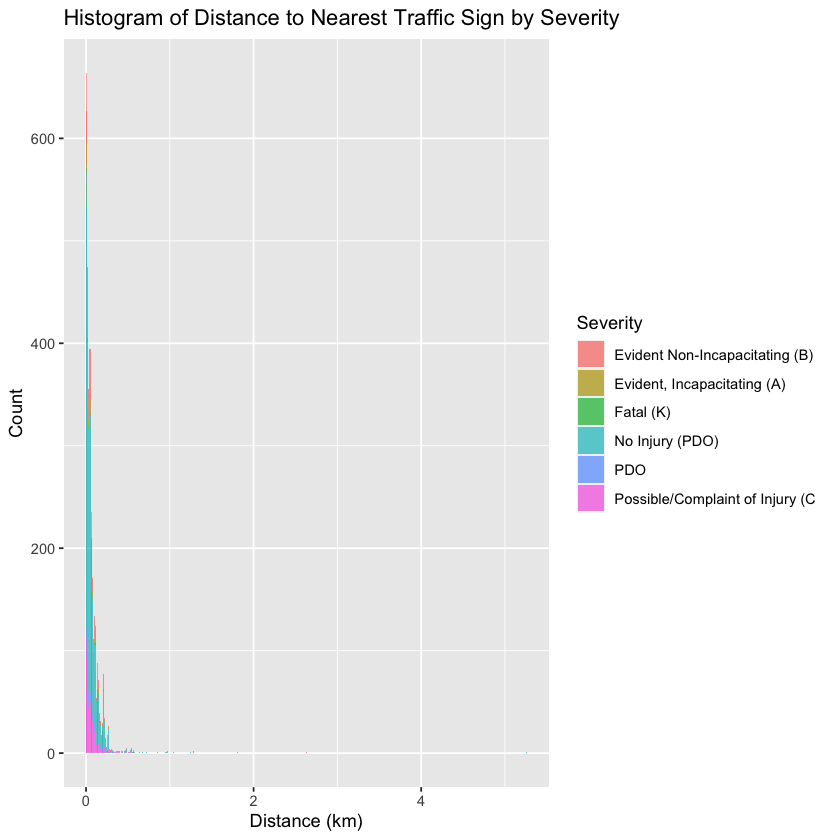

Now we start off with analysis of which variables are major factors in the Severity of the Crashes caused. Below mentioned are few of the Statistical Tests which have been implemented on the data.

1. Generalized Linear Model: We started off by implementing the GLM model while considering Severity of the Crash as the target variable and the Nearest Traffic Sign Distance, Road System, City, and Speed Limit as the predictor variables. The p-values for Nearest Traffic Sign Distance, City, Road System, and Speed Limit are greater than 0.05 which means all these together are not the significant predictors. Then there was 1 particular variable which was CityUNINCORPORATED this had a p-value less than 0.05 which kinda seemed like a significant predictor but further analysis in the subsequent models showed that it wasnt a significant predictor.

2. t-test: We tried using a t-test but due to occurance of various levels in Severity this test was not possible.

3. ANOVA Model: The ANOVA Model is being used to test to check whether or not there is significant difference in the mean distance of the nearest traffic sign among the various types of severity levels. From this test we got that the p-value is greater than 0.05 which means that there is no significant difference in the mean distance to the nearest traffic sign among the different severity levels.

4. Bootstrap: This is an important method to estimate the average distance to the nearest traffic sign from the crash. The main purpose is for us to determine the confidence interval. The confidence interval was found to be 0.0601 to 0.0671. Since the gap in the interval is really less this means that the data is really accurate.

5. Diagnostic Plots: As we know diagnostic plots are mainly used to check the standard assumptions of a linear model such as linearity, normality, and homoscedasticity. For this we have plotted the diagnostic plots for various iterations of the variables and the best plot seems to be the 3rd model which is the one in green. This is because of the following reasons:

    - Residual vs Fitted plot: No constant pattern.
    - Q-Q Plot: The points at one end of the tail entirely lie on the line. This means that the data is partially normally distributed which is realtively better when compared to all othe models.
    - Residual vs Leverage plot: The points arent inside the Cook's distance which means that the model is better and even though these points might affect the model they arent as significant as the other model variables.

    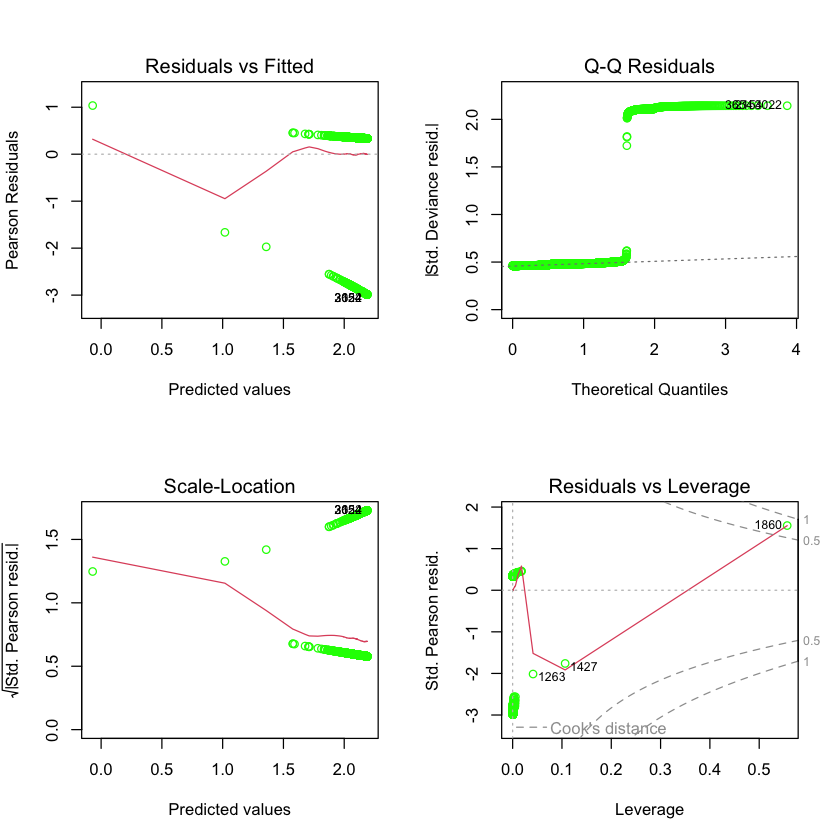

6. Naive Bayes: We have built a naive bayes graph to visually understand the relationship between the variables and the severity of the crash. 

    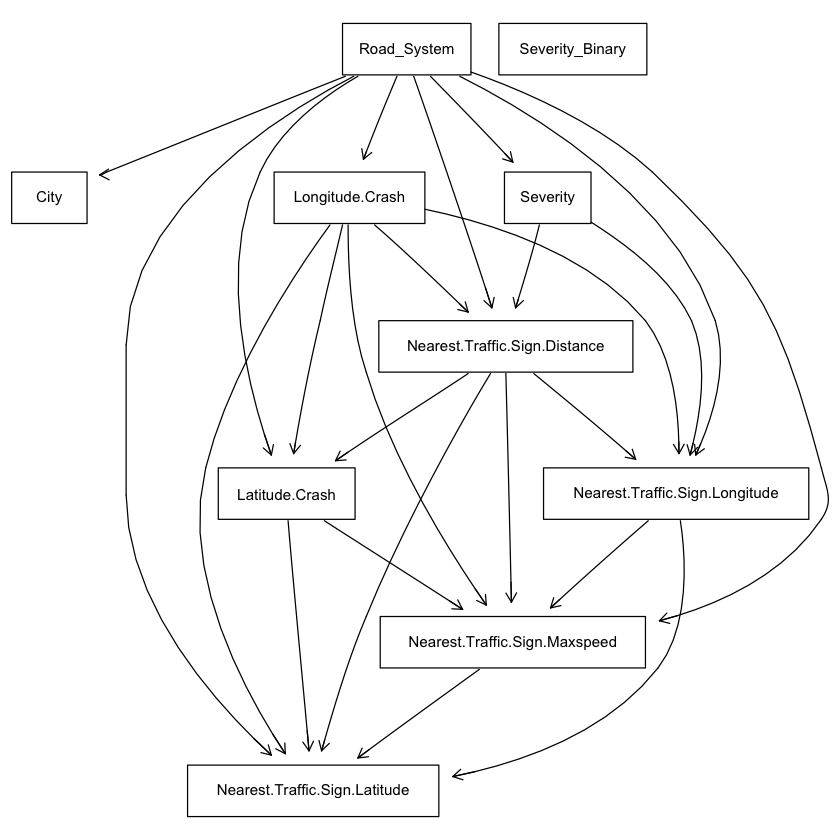

    The results from the output of the code cell mentioned in the code part can be used to understand these relationships along with a few of the conclusions. The distribution of road systems shows that City Streets and State Highways are nearly equally likely to have accidents. When we see the city data we can clearly see that the City of Longmont appears in City Accidents. In the case of Boulder there is a higher occurance of accidents on State Highways. Finall ywhen it comes to County Roads there are higher fatal accidents. The characteristics of the nearest traffic sign, including its location and the maximum speed allowed, depend on multiple factors such as the road system and the crash site

7. AIC and BIC Model: The AIC and BIC values for all the models were evvaualted to check which is the better model. According to AIC we get that the best model is model 4 and according to BIC the best model is model 5. But when we take a look at the diagnostic plot we see that the 3rd model is the best model. 

8. Permutation Test and Confidence Interval: The permuation test was used determine the mean distance to the nearest traffic sign varies based on the severity of the crash. We can clearly see that the p_value is 1 which means that the relation b/w mean distance and severity levels these arent statistically significant. We also have the confidence interval to be 0.0601 to 0.0673 which was verified using the bootstrap method.

9. Finally when we have built a GLM using model 3 that factors in type of road system, severity and nearest traffic sign distance. The p-values gives us the inference that the road system type is the main variable which affects the severity of the crash. In contrast to the other variable which is the Nearest Traffic Sign distance which is not a significant predictor of the severity of the crash.


### Conclusion

Having done all the analysis for the dataset. Here are a few of the conclusions:

1. Importance of Road System: The type of road system plays a significant role in the severity of a crash. The analysis gave us the inference that the County Roads and State Higways have a higher chance of being high severity crashes when compared to City Streets.

2. Proximity to Traffic Signs: Though the research started off by trying to find whether or not they have significant influces on the severity of the crash. The analysis revealed that this parameter isnt a signifcant predictor of the severity of the crash.

3. Statistical Signifiance: The various tests and models which were implemented suggested us that there are various other fators which might even more signifcant that th nearest traffic sign distance.

4. Data Insights: Though multiple tests were implemented the data insights are one of the most important factors since they even tend to show us what exactly are the compilcations while trying to find relations.


### Future Work

1. Future studies can also include various other factors such as weather conditions, time of the day, and the type of vehicle involved in the crash.

2. We can also do a time-series analysis to understand the trends in the crash data over time.

3. Additonally increasing the scope of the study to the entire country based on the avaliability just to increase awareness and improve road safety.

4. Finally if somehow we can get the driver psychological data then it can be mainly used as research in the field of driver behavior and how it affects the crash severity.

5. Finally technolgically advanced systems can be deployed in vehicles, roads to find out such kind of crashes before they occur and alert the driver.

The entire project can be found in this github link:

https://github.com/BhargavN02/Impact-of-Proximity-to-Traffic-Signs-on-Crash-Severity-in-Different-Road-Systems